# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

#Output file (cities.csv)
output_data_file = "../resources/cities.csv"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [9]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []
units = "metric"
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


In [10]:
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lats[0]}&lon={lngs[0]}&appid={weather_api_key}&units={units}'
url

'https://api.openweathermap.org/data/2.5/weather?lat=11.363376997007506&lon=-19.10384486488215&appid=889cc7f91cc31646ab7cbc99fac663a9&units=metric'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [11]:
# Set the API base URL
#url = f'https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}'
url = f'https://api.openweathermap.org/data/2.5/weather?lat={lats[0]}&lon={lngs[0]}&appid={weather_api_key}&units={units}'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | oussouye
Processing Record 2 of Set 1 | bambous virieux
Processing Record 3 of Set 1 | ostersund
Processing Record 4 of Set 1 | albany
Processing Record 5 of Set 1 | chokurdakh
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | thompson
Processing Record 9 of Set 1 | mar del plata
Processing Record 10 of Set 1 | sola
Processing Record 11 of Set 1 | manoel urbano
Processing Record 12 of Set 1 | ponta do sol
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | marawi
Processing Record 16 of Set 1 | parkes
Processing Record 17 of Set 1 | byron bay
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | minas
Processing Record 21 of Set 1 | saint george
Processing Record 22 of Set 1 | marcona
City not fou

Processing Record 35 of Set 4 | karsun
Processing Record 36 of Set 4 | buritama
Processing Record 37 of Set 4 | fort saint james
Processing Record 38 of Set 4 | fairbanks
Processing Record 39 of Set 4 | maragogi
Processing Record 40 of Set 4 | ikongo
Processing Record 41 of Set 4 | bathsheba
Processing Record 42 of Set 4 | les cayes
Processing Record 43 of Set 4 | nome
Processing Record 44 of Set 4 | strezhevoy
Processing Record 45 of Set 4 | carnarvon
Processing Record 46 of Set 4 | itaiba
Processing Record 47 of Set 4 | ouadda
Processing Record 48 of Set 4 | celestun
Processing Record 49 of Set 4 | thurso
Processing Record 0 of Set 5 | yicheng
Processing Record 1 of Set 5 | mahebourg
Processing Record 2 of Set 5 | chuy
Processing Record 3 of Set 5 | cockburn town
Processing Record 4 of Set 5 | beipiao
Processing Record 5 of Set 5 | cockburn harbour
City not found. Skipping...
Processing Record 6 of Set 5 | nouadhibou
Processing Record 7 of Set 5 | mims
Processing Record 8 of Set 5 | 

Processing Record 28 of Set 8 | oxford
Processing Record 29 of Set 8 | sao felix do xingu
Processing Record 30 of Set 8 | severo-kurilsk
Processing Record 31 of Set 8 | itarema
Processing Record 32 of Set 8 | kendari
Processing Record 33 of Set 8 | antofagasta
Processing Record 34 of Set 8 | tarko-sale
Processing Record 35 of Set 8 | novonikolayevskiy
Processing Record 36 of Set 8 | phan thiet
Processing Record 37 of Set 8 | tessalit
Processing Record 38 of Set 8 | rolim de moura
City not found. Skipping...
Processing Record 39 of Set 8 | singkang
Processing Record 40 of Set 8 | pagman
City not found. Skipping...
Processing Record 41 of Set 8 | rawson
Processing Record 42 of Set 8 | whitehorse
Processing Record 43 of Set 8 | ulaangom
Processing Record 44 of Set 8 | banda aceh
Processing Record 45 of Set 8 | kuito
Processing Record 46 of Set 8 | tucupita
Processing Record 47 of Set 8 | qiongshan
Processing Record 48 of Set 8 | obo
Processing Record 49 of Set 8 | chifeng
Processing Recor

Processing Record 16 of Set 12 | hami
Processing Record 17 of Set 12 | sombrio
Processing Record 18 of Set 12 | clarence town
Processing Record 19 of Set 12 | woodward
Processing Record 20 of Set 12 | mandalgovi
Processing Record 21 of Set 12 | tamale
Processing Record 22 of Set 12 | ustynivka
Processing Record 23 of Set 12 | mnogovershinnyy
Processing Record 24 of Set 12 | bilibino
Processing Record 25 of Set 12 | catuday
Processing Record 26 of Set 12 | bondo
Processing Record 27 of Set 12 | kahului
Processing Record 28 of Set 12 | jishou
Processing Record 29 of Set 12 | yenagoa
Processing Record 30 of Set 12 | grand forks
Processing Record 31 of Set 12 | lafia
Processing Record 32 of Set 12 | san quintin
Processing Record 33 of Set 12 | vysokopillya
Processing Record 34 of Set 12 | ambanja
Processing Record 35 of Set 12 | la romana
Processing Record 36 of Set 12 | ilulissat
Processing Record 37 of Set 12 | nicoya
Processing Record 38 of Set 12 | tsabong
Processing Record 39 of Set 1

In [12]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          547
Lat           547
Lng           547
Max Temp      547
Humidity      547
Cloudiness    547
Wind Speed    547
Country       547
Date          547
dtype: int64

In [13]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,oussouye,12.4850,-16.5469,23.10,52,3,4.99,SN,1675204097
1,bambous virieux,-20.3428,57.7575,26.14,89,40,2.57,MU,1675204097
2,ostersund,63.1792,14.6357,-6.75,100,20,2.06,SE,1675204098
3,albany,42.6001,-73.9662,-3.21,57,86,0.89,US,1675204098
4,chokurdakh,70.6333,147.9167,-16.71,97,100,0.87,RU,1675204099


In [14]:
# Export the City_Data into a csv
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Read saved data
city_data_df = pd.read_csv(output_data_file, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oussouye,12.4850,-16.5469,23.10,52,3,4.99,SN,1675204097
1,bambous virieux,-20.3428,57.7575,26.14,89,40,2.57,MU,1675204097
2,ostersund,63.1792,14.6357,-6.75,100,20,2.06,SE,1675204098
3,albany,42.6001,-73.9662,-3.21,57,86,0.89,US,1675204098
4,chokurdakh,70.6333,147.9167,-16.71,97,100,0.87,RU,1675204099


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [16]:
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

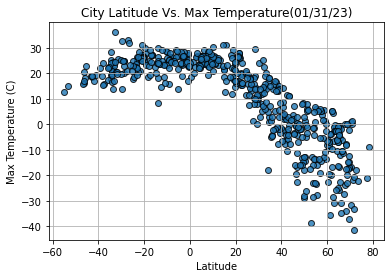

In [18]:
# Build scatter plot for latitude vs. temperature

plt.scatter(lats,
            max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Max Temperature(%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../resources/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

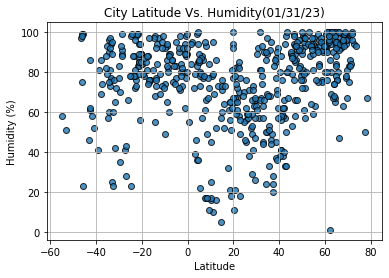

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats,
            humidity,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Humidity(%s)" % time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../resources/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

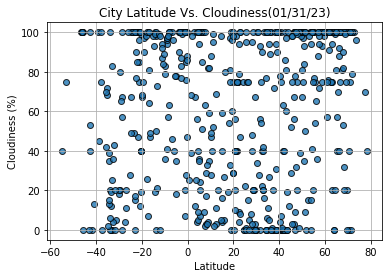

In [20]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../resources/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

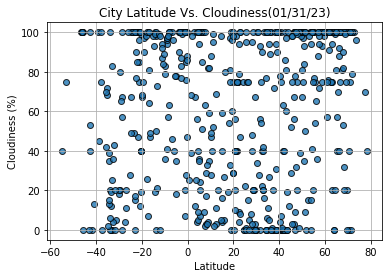

In [21]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats,
            cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")


# Incorporate the other graph properties
plt.title("City Latitude Vs. Cloudiness(%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../resources/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [29]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values,y_values,title,text_coordinates):
    
    #regression on southern hemisphere
    (slope, intercept, rvalue, pvalue, stderr) = linregress (x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + " x + " + str(round(intercept,2))
    
    #plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq,text_coordinates, fontsize=15, color="red")
    plt.xlabel("Latitude")
    #plt.ylabel("Title")
    print(f"The r-squared is: {rvalue}")
    plt.show()

    

In [30]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,oussouye,12.4850,-16.5469,23.10,52,3,4.99,SN,1675204097
2,ostersund,63.1792,14.6357,-6.75,100,20,2.06,SE,1675204098
3,albany,42.6001,-73.9662,-3.21,57,86,0.89,US,1675204098
4,chokurdakh,70.6333,147.9167,-16.71,97,100,0.87,RU,1675204099
5,hilo,19.7297,-155.0900,23.68,94,75,1.54,US,1675204099


In [31]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bambous virieux,-20.3428,57.7575,26.14,89,40,2.57,MU,1675204097
6,ushuaia,-54.8000,-68.3000,12.81,58,40,2.06,AR,1675204099
8,mar del plata,-38.0023,-57.5575,23.94,86,75,7.20,AR,1675204100
9,sola,-13.8833,167.5500,26.41,77,98,1.93,VU,1675204100
10,manoel urbano,-8.8389,-69.2597,26.21,86,94,1.73,BR,1675204068


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: -0.8441705413997802


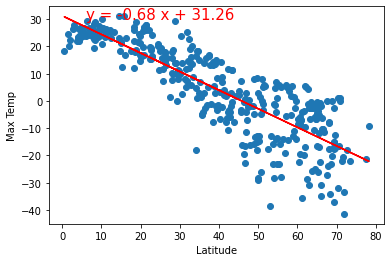

In [32]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (6,30))


The r-squared is: 0.3828544979459451


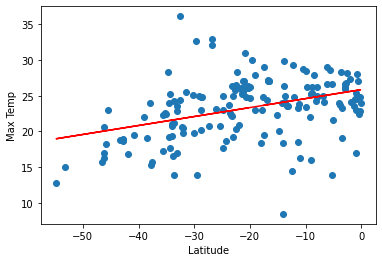

In [33]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Max Temp"]
plt.ylabel("Max Temp")
plot_linear_regression(x_values,y_values, 'Max Temp', (-30,40))

**Discussion about the linear relationship:** When comparing the temperature and latitude of the northern hemisphere there is a high negative correlation because the r-squared value is -0.83. For the the Southern Hemisphere there is a low positive correlation because the r-squared value is 0.41.

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.43693642496512375


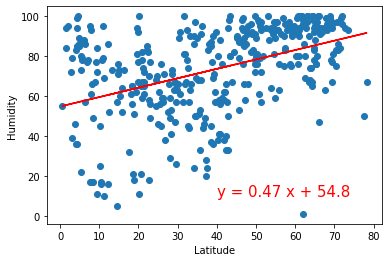

In [35]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (40,10))

The r-squared is: 0.28011897477085934


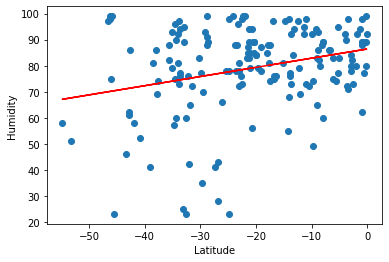

In [36]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Humidity"]
plt.ylabel("Humidity")
plot_linear_regression(x_values,y_values, 'Humidity', (-30,150))

**Discussion about the linear relationship:**  When comparing the humidity and latitude of the northern hemisphere there is a low positive correlation because the r-squared value is 0.42. For the the Southern Hemisphere there is a negligible correlation because the r-squared value is 0.22.

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.32581441346213086


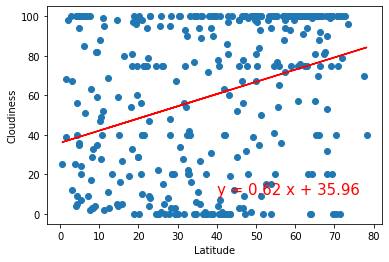

In [37]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Cloudiness"]
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (40,10))

The r-squared is: 0.32765600970006803


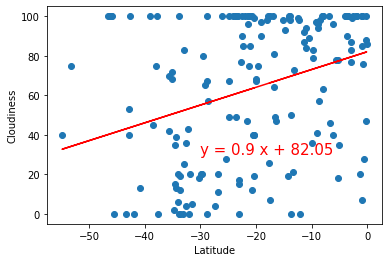

In [38]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Cloudiness"] 
plt.ylabel("Cloudiness")
plot_linear_regression(x_values,y_values, 'Cloudiness', (-30,30))

**Discussion about the linear relationship:** When comparing the cloudiness and latitude of the northern hemisphere there is a low positive correlation because the r-squared value is 0.31. For the the Southern Hemisphere there is a negligible correlation because the r-squared value is 0.19.

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.14659491177932701


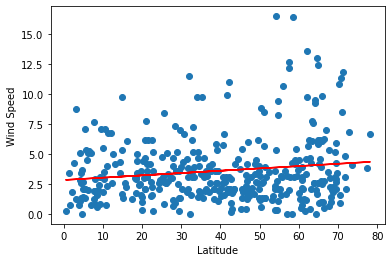

In [39]:
# Northern Hemisphere
x_values = northern_hemi_df ["Lat"]
y_values = northern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Windspeed', (40,25))

The r-squared is: -0.24295828873551348


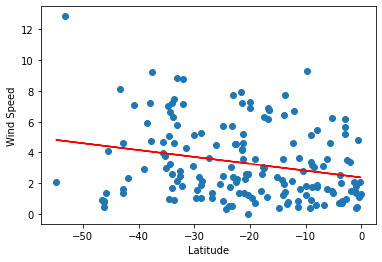

In [40]:
# Southern Hemisphere
x_values = southern_hemi_df ["Lat"]
y_values = southern_hemi_df ["Wind Speed"]
plt.ylabel("Wind Speed")
plot_linear_regression(x_values,y_values, 'Wind Speed', (-30,30))

**Discussion about the linear relationship:** When comparing the wind speed and latitude for the northern hemisphere there is a negligible correlation because the r-squared value is 0.05. For the the Southern Hemisphere there is a low negative correlation because the r-squared value is 0.05.